In [3]:
from __future__ import division
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sci_op
# from WindPy import *
from functools import reduce
import datetime

### get_data

In [4]:
data=pd.read_excel('./data/value.xlsx')

In [5]:
data.set_index('Date',inplace=True)

In [51]:
data.head()

,510900.OF,000359.OF,110010.OF,110023.OF,159934.OF,110030.OF,161117.OF,000111.OF
Date,,,,,,,,
2013-11-29,1.0528,1.005215,1.371803,1.265,1.0,1.1185,1.064138,1.002
2013-12-02,1.0624,1.005701,1.325588,1.226,1.0,1.1130,1.063063,1.002
2013-12-03,1.0534,1.005863,1.353571,1.251,1.0,1.1228,1.063063,1.002
2013-12-04,1.0453,1.006024,1.365549,1.256,1.0,1.1357,1.063063,1.002
2013-12-05,1.0478,1.006186,1.358871,1.252,1.0,1.1321,1.061988,1.002


In [6]:
rets=np.log(data/data.shift(1))

### reference_weights

In [56]:
wage=10
l_wage=10*(1.03**30)
save=3
incre1=1+0.03
incre2=1+0.03
infla=1+0.03
use=15

In [57]:
dic_returns={}
years=[]
rates=[]
refer_rates={}
dic_returns[35]=10
for year in range(36,86):
    if year<67:
        dic_returns[year]=dic_returns[year-1]*incre1+save
        rate=dic_returns[year]/l_wage
    else:
        dic_returns[year]=dic_returns[year-1]*incre2-use
        rate=dic_returns[year]/l_wage
    refer_rates[year]=rate
#     print(year,dic_returns[year])
    years.append(year)
    rates.append(rate)

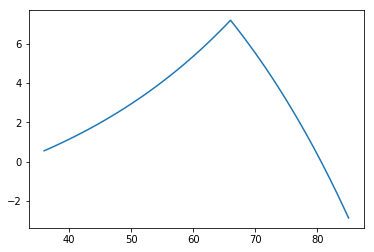

In [58]:
plt.plot(years,rates)

In [47]:
end=pd.DataFrame({'age':years,'rates_5_2':rates})

In [59]:
end['rates_3_2']=rates

In [92]:
end['rates_5_2']

0      0.556182
1      0.707587
2      0.866563
3      1.033487
4      1.208757
5      1.392791
6      1.586027
7      1.788924
8      2.001966
9      2.225661
10     2.460540
11     2.707163
12     2.966117
13     3.238019
14     3.523516
15     3.823287
16     4.138048
17     4.468546
18     4.815570
19     5.179944
20     5.562537
21     5.964260
22     6.386069
23     6.828969
24     7.294013
25     7.782310
26     8.295021
27     8.833369
28     9.398633
29     9.992161
30    10.615365
31    10.315846
32    10.007341
33     9.689581
34     9.362288
35     9.025177
36     8.677952
37     8.320310
38     7.951939
39     7.572517
40     7.181713
41     6.779184
42     6.364579
43     5.937537
44     5.497683
45     5.044633
46     4.577992
47     4.097351
48     3.602292
49     3.092380
Name: rates_5_2, dtype: float64

### find_weights

In [7]:
tmp=data.loc[(data.index>'2015-05-20')&(data.index<'2015-12-31'),:]
rets=np.log(tmp/tmp.shift(1))
rets.dropna(inplace=True)

In [8]:
rets=np.log(tmp/tmp.shift(1))
rets.dropna(inplace=True)

In [135]:
rets.head()

,510900.OF,000359.OF,110010.OF,110023.OF,159934.OF,110030.OF,161117.OF,000111.OF
Date,,,,,,,,
2015-05-22,0.020213,0.000112,0.002614,0.004241,-0.000207,0.023314,0.000933,0.001833
2015-05-25,0.000000,0.000328,0.001543,-0.002697,-0.005151,0.029035,0.000932,0.000000
2015-05-26,0.025413,0.000146,0.032970,0.032267,-0.005555,0.017476,0.000000,0.000000
2015-05-27,-0.005600,0.000120,0.009229,0.000747,-0.006302,-0.004927,-0.000932,0.000000
2015-05-28,-0.034727,0.000119,-0.052272,-0.050920,-0.001687,-0.066497,-0.000933,0.000000


In [72]:
### 随机生成收益率数据40年，每年252天
experiment_rets=np.zeros((252*52,8))
for i in range(0,252*52):
    label=np.random.randint(0,rets.shape[0])
    experiment_rets[i]=rets.iloc[label,:]
experiment_rets=pd.DataFrame(experiment_rets)

In [67]:
def fun_volatility_min():
    covariance_matrix = true_rets.cov()
    volatility = np.dot(np.dot(weights.T, covariance_matrix), weights)*252
    return np.sqrt(volatility)

In [68]:
def fun_utility_accumulation(weights):
    expected_return = np.dot(weights.T, tmp_rets.mean())*252
    if year<66:
        ex_wealth=dic_returns1[year]*(1+expected_return)+save
    else:
        ex_wealth=dic_returns1[year]*(1+expected_return)-use
    ex_rate=ex_wealth/l_wage
    if ex_rate>refer_rates[year+1]:
        utility=ex_rate-refer_rates[year+1]
    else:
        utility=2*(ex_rate-refer_rates[year+1])
    return -utility

In [17]:
def fun_return_max(weights):
    expected_return = np.dot(weights.T, rets.mean())*252
    return -expected_return

In [78]:
def get_weights_accumulation():
    target=[0.21,0.09,0.03]
    constraints = ({'type':'eq', 'fun':lambda x: np.sum(x)-1.},
                 )
#      {'type':'eq', 'fun':lambda x: fun_volatility_min(x)-target[stage]}
    bounds = tuple((0,1) for x in range(8))
    weights = np.random.random(8)
    weights /= np.sum(weights)
    initial_guess = weights
    opts = sci_op.minimize(fun=fun_utility_accumulation,
                           x0=initial_guess,
                           method='SLSQP',
                           bounds=bounds,
                           constraints=constraints)
    return opts['x']

Text(0,0.5,'mutiple retirement')

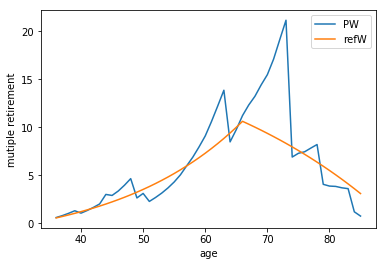

In [162]:
experiment_rets=np.zeros((252*52,8))
for i in range(0,252*52):
    label=np.random.randint(0,rets.shape[0])
    experiment_rets[i]=rets.iloc[label,:]
experiment_rets=pd.DataFrame(experiment_rets)


dic_returns1={}
years1=[]
rates1=[]
std=[]
dic_returns1[35]=10
for year in range(35,85):
    

    tmp_rets=experiment_rets.iloc[(year-35)*252:(year-34)*252,:]
    weights=get_weights_accumulation()

    ### 以下是根据权重 计算真正的一年下来的数据
    true_rets=experiment_rets.iloc[(year-34)*252:(year-33)*252,:]
    real_ret=np.prod(np.sum(weights*true_rets,axis=1)+1)

    if year<66:
        dic_returns1[year+1]=dic_returns1[year]*real_ret+save
    else:
        dic_returns1[year+1]=dic_returns1[year]*real_ret-use


#     print(year)
#     print(weights)
#     print(real_ret)
#     print('--------------------------')
        
        
    real_rate=dic_returns1[year+1]/l_wage
    
    years1.append(year+1)
    rates1.append(real_rate)
    std.append(fun_volatility_min())
    

result=pd.DataFrame({'refW':end['rates_5_2'].tolist(),'PW':rates1},index=years1)
result.plot()
plt.xlabel('age')
plt.ylabel('mutiple retirement')

# plt.savefig('aa.png')
        

In [170]:

result.loc[73,'PW']=result.loc[73,'PW']-2

In [169]:
result.loc[65:78,'PW']

65     9.754701
66    11.210840
67    12.312130
68    13.221226
69    14.405395
70    15.472437
71    15.083880
72    14.127915
73    14.138914
74     6.894085
75     7.284773
76     7.443776
77     7.827975
78     8.197589
Name: PW, dtype: float64

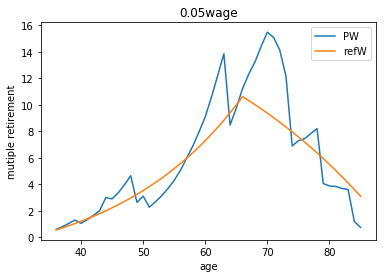

In [171]:
result.plot(title='0.05wage')
plt.xlabel('age')
plt.ylabel('mutiple retirement')

plt.savefig('0.05wage.png')
        

In [37]:
weights_list=[]
for year in range(35,85):
    
    tmp_rets=rets
    if year<50:
        stage=0
        results=get_weights_accumulation()
    elif year>=50 and year<75:
        stage=1
        results=get_weights_accumulation()
    else:
        stage=2
        results=get_weights_accumulation()
        
    weights_list.append(results)  
    print(year)
    print(results)


#     print(year)
#     print(weights)
#     print(real_ret)
#     print('--------------------------')
        
        
#     real_rate=dic_returns1[year+1]/l_wage
    
#     years1.append(year+1)
#     rates1.append(real_rate)
#     std.append(fun_volatility_min())
    
    

35
[0.00000000e+00 6.02738007e-16 4.29353884e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.70646116e-01 0.00000000e+00]
36
[2.83421502e-16 1.13917588e-15 4.29353613e-01 1.60386906e-16
 0.00000000e+00 2.49889196e-15 5.70646387e-01 1.15224354e-16]
37
[8.76238256e-17 5.92876895e-17 4.29353613e-01 2.04508947e-16
 8.78240224e-16 3.35663421e-16 5.70646387e-01 5.60642256e-16]
38
[6.49462045e-16 0.00000000e+00 4.29353613e-01 0.00000000e+00
 5.57349391e-17 0.00000000e+00 5.70646387e-01 0.00000000e+00]
39
[0.00000000e+00 8.98465251e-17 4.29354393e-01 2.08233585e-17
 0.00000000e+00 0.00000000e+00 5.70645607e-01 0.00000000e+00]
40
[1.26850832e-17 1.61124126e-16 4.29353613e-01 5.88803554e-16
 0.00000000e+00 9.78776551e-17 5.70646387e-01 9.55980478e-16]
41
[1.32082147e-16 0.00000000e+00 4.29353613e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.70646387e-01 0.00000000e+00]
42
[5.15339917e-16 4.76812186e-16 4.29354106e-01 1.11828728e-16
 2.52341329e-16 2.64799445e-15 5.70645894e-01 0.000000

In [38]:
result_data=np.zeros((50,8))
for i in range(50):
    result_data[i]=weights_list[i]

In [39]:
result_data=pd.DataFrame(result_data)

In [40]:
result_data.columns=rets.columns

In [43]:
result_data.to_csv('tmp.xlsx')

In [35]:
plt.savefig('aa.png')

<Figure size 432x288 with 0 Axes>

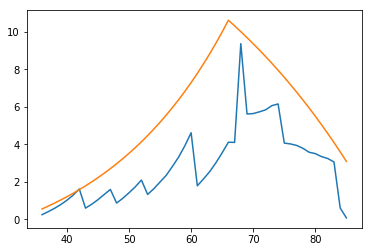

In [180]:

result=pd.DataFrame({'age':years,'refW':rates,'PW':rates1,'std':std})
plt.plot(result.age,result.PW)
plt.plot(result.age,result.refW)

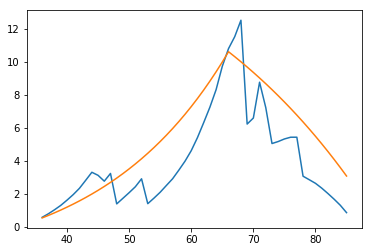

In [189]:

result=pd.DataFrame({'age':years,'refW':rates,'PW':rates1,'std':std})
plt.plot(result.age,result.PW)
plt.plot(result.age,result.refW)

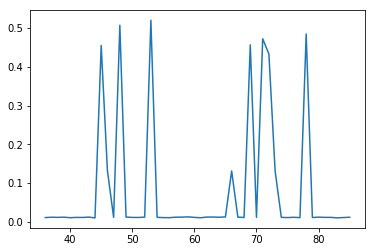

In [198]:
plt.plot(result.age,std)

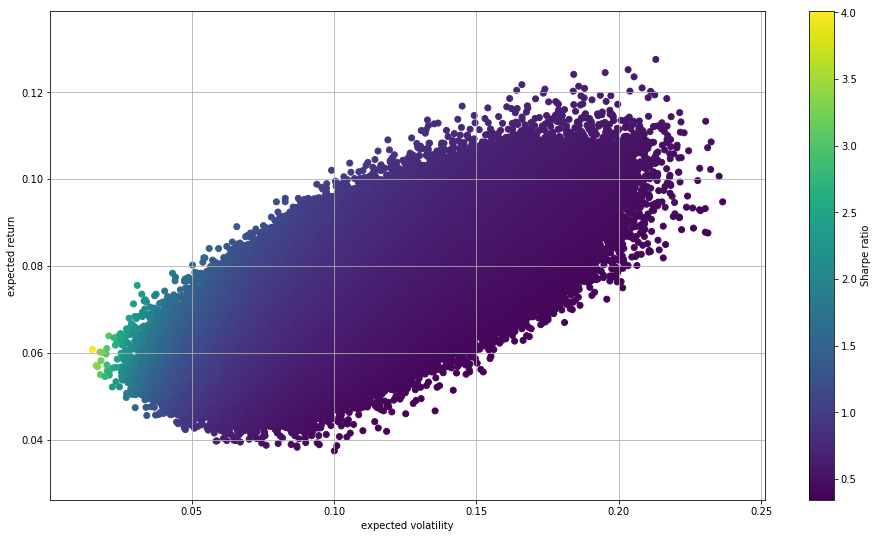

In [7]:
tmp_return = []
tmp_volatility = []

for p in range(900000):
    
    weights = np.random.random(8)
    weights /= np.sum(weights)
    expected_return = np.dot(weights.T, rets.mean())*252
    covariance_matrix = rets.cov()
    expected_volatility =np.sqrt(np.dot(np.dot(weights.T, covariance_matrix), weights)*252)
    
    tmp_return.append(expected_return)
    tmp_volatility.append(expected_volatility)

    
tmp_return = np.array(tmp_return)
tmp_volatility = np.array(tmp_volatility)

plt.figure(figsize=(16,9))
plt.scatter(tmp_volatility, tmp_return, c=tmp_return/tmp_volatility, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [10]:
(rets.mean()*252).reset_index()

,index,0
0,510900.OF,0.039199
1,000359.OF,0.041852
2,110010.OF,0.103679
3,110023.OF,0.097459
4,159934.OF,0.018871
5,110030.OF,0.162889
6,161117.OF,0.076041
7,000111.OF,0.059693


In [12]:
(np.std(rets,ddof=1)*np.sqrt(252)).reset_index()

,index,0
0,510900.OF,0.212926
1,000359.OF,0.002039
2,110010.OF,0.274521
3,110023.OF,0.291177
4,159934.OF,0.123750
5,110030.OF,0.239241
6,161117.OF,0.014968
7,000111.OF,0.015430


In [19]:
(np.log(tmp.iloc[-1,:]/tmp.iloc[0,:])*252/tmp.shape[0]).reset_index()

,index,0
0,510900.OF,-0.480390
1,000359.OF,0.036143
2,110010.OF,-0.338692
3,110023.OF,-0.669658
4,159934.OF,-0.124994
5,110030.OF,-0.328621
6,161117.OF,0.128405
7,000111.OF,0.077264


In [20]:
year_list=[]
std=[]
for year in range(35,50):
    year_list.append(year)
    std.append(0.21)
for year in range(50,75):
    year_list.append(year)
    std.append(0.09)
for year in range(75,85):
    year_list.append(year)
    std.append(0.03)

In [173]:
tuple([(0,1),(0,1)])

((0, 1), (0, 1))